In [30]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os

In [44]:
def edit_image(image_path, watermark_text, output_path):
    # Membaca gambar
    img = Image.open(image_path)

    # 1. Meningkatkan kecerahan gambar sebanyak 30%
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(1.3)

    # 2. Mengubah ukuran gambar menjadi 300x300 pixel
    img = img.resize((300, 300))

    # 3. Menambahkan border dengan lebar 10 pixel
    border_size = 10
    img = ImageOps.expand(img, border=border_size, fill='black')  # Ganti 'black' dengan warna border yang diinginkan

    # 4. Meningkatkan ketajaman gambar
    img = img.filter(ImageFilter.SHARPEN)

    # 5. Mengubah gambar menjadi grayscale
    img_gray = img.convert('L')

    # 6. Menambahkan watermark
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()  # Menggunakan font default
    text_bbox = font.getbbox(watermark_text)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    position = (img.width - text_width - 15, img.height - text_height - 15)  # Posisi di sudut kanan bawah
    draw.text(position, watermark_text, fill='RED', font=font)

    # 7. Menyimpan gambar yang sudah diedit
    img.save(output_path)
    grayscale_output_path = output_path.replace('.png', '_grayscale.png') 
    img_gray.save(grayscale_output_path)
    
    return img, img_gray

In [45]:
def show_images(original_image, edited_image, edited_image_gray):
    # 8. Menampilkan perbandingan gambar asli dan gambar hasil manipulasi
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title("Gambar Asli")
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Gambar Diedit")
    plt.imshow(edited_image)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Gambar Grayscale")
    plt.imshow(edited_image_gray, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [46]:
def process_images(image_paths, watermark_text, output_dir):
    for image_path in image_paths:
        # Mendapatkan nama file tanpa ekstensi
        base_name = os.path.basename(image_path).split('.')[0]
        output_path = os.path.join(output_dir, f"{base_name}_edited.png")

        # Mengedit gambar
        edited_image, edited_image_gray = edit_image(image_path, watermark_text, output_path)

        # Menampilkan gambar
        original_image = Image.open(image_path)
        show_images(original_image, edited_image, edited_image_gray)

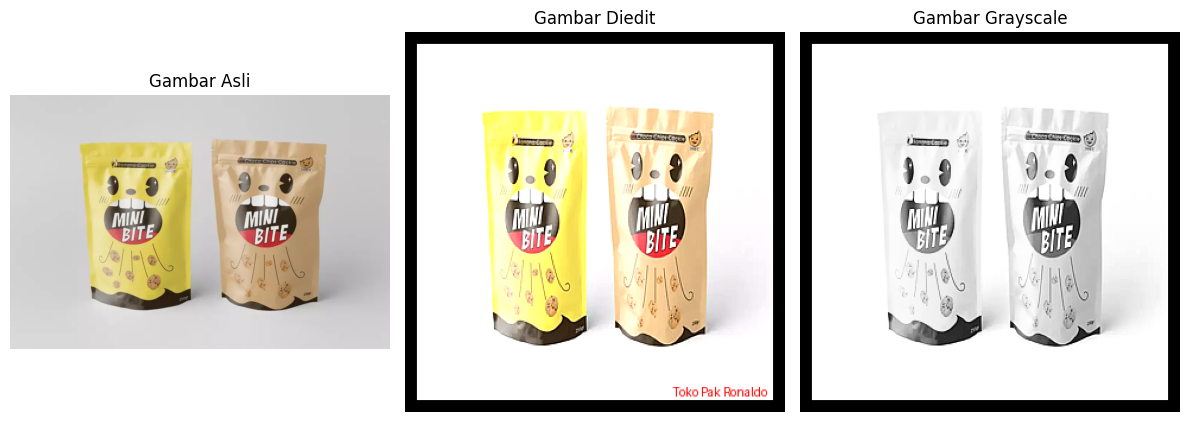

In [47]:
if __name__ == "__main__":
    # Daftar gambar yang ingin diproses
    image_paths = ['produk-makanan.webp']  
    watermark_text = "Toko Pak Ronaldo"
    output_dir = 'output_images'  # Folder untuk menyimpan gambar yang diedit

    # Membuat folder output jika belum ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Memproses gambar
    process_images(image_paths, watermark_text, output_dir)